In [1]:
import pandas as pd

In [2]:
Data=pd.read_csv('train.csv')

In [3]:
import pandas as pd

def nullMng(Data,Null_values='mean'):
    for i in range(Data.shape[1]-1):
        if Data[Data.columns[i]].dtype=='O':
            Data[Data.columns[i]][Data[Data.columns[i]].isnull()]='012789'
        else:
            if Null_values=='mean':
                Data[Data.columns[i]][Data[Data.columns[i]].isnull()]=Data[Data.columns[i]].mean()
            elif Null_values=='mode':
                Data[Data.columns[i]][Data[Data.columns[i]].isnull()]=Data[Data.columns[i]].mode()
            elif Null_values=='median':
                Data[Data.columns[i]][Data[Data.columns[i]].isnull()]=Data[Data.columns[i]].median()
            else:
                Data[Data.columns[i]][Data[Data.columns[i]].isnull()]=Null_values
    Data=Data.dropna()
    return Data
                
            

def dataEncoding(Data):
    Dumies=pd.DataFrame()
    for i in range(Data.shape[1]-1):
        if Data[Data.columns[i]].dtype=='O':
            dum=pd.get_dummies(data=Data[Data.columns[i]])
            if '012789' in dum.columns:
                dum=dum.drop(['012789'],'columns')
            else:
                dum=dum.drop(dum.columns[0],'columns')
            Dumies=pd.concat([Dumies,dum],'columns')
        else:
            pass
        
    y=Data[Data.columns[Data.shape[1]-1]]
    Data=Data.drop(Data.columns[Data.shape[1]-1],'columns')
    i=0
    while(i<Data.shape[1]):
        if Data[Data.columns[i]].dtype=='O':
            Data=Data.drop(Data.columns[i],'columns')
            i=i-1
        i=i+1
    
    Data=pd.concat([Data,Dumies,y],'columns')
    return Data
    
def nullElimination(Data,Threshold=.15):
    i=0
    while(i<Data.shape[1]-1):
        thr=Data[Data.columns[i]].shape[0]*Threshold
        if Data[Data.columns[i]][Data[Data.columns[i]].isnull()].shape[0]>thr:
            Data=Data.drop(Data.columns[i],'columns')
            i=i-1
        i=i+1
    return Data
    
def inAprenter(Data):
    Data = Data.applymap(lambda s:s.lower() if type(s) == str else s)
    return Data

In [4]:
Data=inAprenter(Data)

In [5]:
Data=nullElimination(Data,0)

In [6]:
Data=nullMng(Data,Null_values='mean')

F:\Windows\Anaconda3\envs\AI\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
F:\Windows\Anaconda3\envs\AI\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
Data.shape

(1460, 62)

In [8]:
Data=dataEncoding(Data)

In [9]:
Data.shape

(1460, 190)

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 190 entries, Id to SalePrice
dtypes: int64(35), uint8(155)
memory usage: 631.6 KB


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ARDRegression,HuberRegressor

In [12]:
model1=LinearRegression()
model2=Ridge()
model3=Lasso()
model4=ARDRegression()
model5=HuberRegressor()

In [13]:
y=Data.values[:,Data.shape[1]-1]
X=Data.values[:,1:Data.shape[1]-1]

In [14]:
X,x,Y,y=train_test_split(X,y,test_size=0.25)

In [15]:
X.shape

(1095, 188)

In [16]:
x.shape

(365, 188)

In [17]:
model1.fit(X,Y)
model2.fit(X,Y)
model3.fit(X,Y)
model4.fit(X,Y)
model5.fit(X,Y)

F:\Windows\Anaconda3\envs\AI\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144808347338.25436, tolerance: 749415584.5630922
  positive)
F:\Windows\Anaconda3\envs\AI\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor()

In [18]:
print(((model1.predict(x)-abs(model1.predict(x)-y))/y).mean())
print(((model2.predict(x)-abs(model2.predict(x)-y))/y).mean())
print(((model3.predict(x)-abs(model3.predict(x)-y))/y).mean())
print(((model4.predict(x)-abs(model4.predict(x)-y))/y).mean())
print(((model5.predict(x)-abs(model5.predict(x)-y))/y).mean())

0.9114395082032486
0.9034196307622624
0.9117995088495703
0.9082172289206576
0.8991172041579197


In [19]:
import matplotlib.pyplot as plt

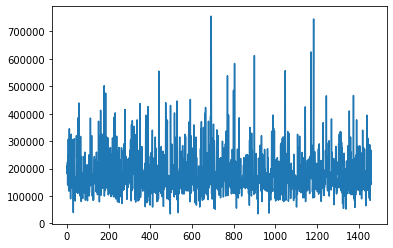

In [20]:
plt.plot(Data.values[:,0],Data.values[:,Data.shape[1]-1])
plt.show()

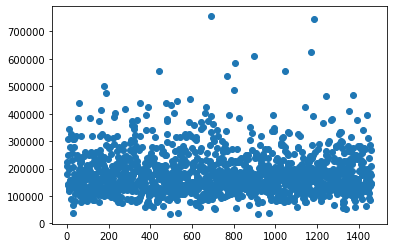

In [21]:
plt.scatter(Data.values[:,0],Data.values[:,Data.shape[1]-1])
plt.show()

In [22]:
for i in range(Data.shape[0]-1):
        if Data[Data.columns[Data.shape[1]-1]][i]>400000:
            Data=Data.drop([i],axis=0)

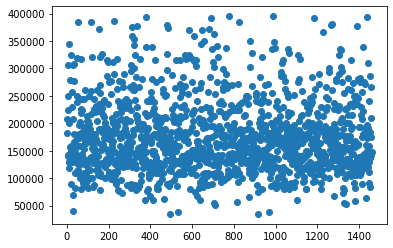

In [23]:
plt.scatter(Data.values[:,0],Data.values[:,Data.shape[1]-1])
plt.show()

In [24]:
Data.shape

(1432, 190)

In [25]:
y=Data.values[:,Data.shape[1]-1]
X=Data.values[:,1:Data.shape[1]-1]

In [26]:
X,x,Y,y=train_test_split(X,y,test_size=0.25)

In [27]:
model1.fit(X,Y)
model2.fit(X,Y)
model3.fit(X,Y)
model4.fit(X,Y)
model5.fit(X,Y)

F:\Windows\Anaconda3\envs\AI\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122470057796.00064, tolerance: 464086175.4321885
  positive)
F:\Windows\Anaconda3\envs\AI\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor()

In [28]:
print(((model1.predict(x)-abs(model1.predict(x)-y))/y).mean())
print(((model2.predict(x)-abs(model2.predict(x)-y))/y).mean())
print(((model3.predict(x)-abs(model3.predict(x)-y))/y).mean())
print(((model4.predict(x)-abs(model4.predict(x)-y))/y).mean())
print(((model5.predict(x)-abs(model5.predict(x)-y))/y).mean())

0.896511773828751
0.9043735223173675
0.8970320437867693
0.9008363442166806
0.8867790192457328
